In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')

1.0
7.0



- mean() để tính giá trị trung bình
- median() để tính giá trị trung vị -- sắp xếp theo thứ tự, trung vị sẽ nằm ở giữa

In [4]:
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')

3.74
3.625



- mode(): yếu vị - trả về giá trị xuất hiện nhiều nhất trong cột

In [5]:
print(f'{df["KT"].mode()}\n')

0    A
Name: KT, dtype: object



- quantile(q): tứ phân vị tương ứng với q1 q2 q3 q4

In [6]:
print(f'{df["M1"].quantile(0.25)}\n')

2.5



In [7]:
# Hãy tính phân vị thứ 9 trong thập phân vị (gọi là p9) cho M1 và M2
# Gợi ý: phân vị thứ 9 có thỉ lệ là 0.9
print(f'{df["M1"].quantile(0.9)}\n{df["M2"].quantile(0.9)}')

5.300000000000004
5.5


### Các đại lượng đo lường đồ biến động (phân tán)

In [8]:
#Khoảng giao động
range = df['M1'].max() - df['M1'].min()
range

np.float64(6.0)

In [9]:
#Độ lớn của IQR
iqr = df['M1'].quantile(0.75) - df['M1'].quantile(0.25)
iqr

np.float64(2.25)

In [10]:
#Khoảng giá trị IQR của M2 - độ lớn của IQR
a = df['M2'].quantile(0.75) - df['M2'].quantile(0.25)

In [11]:
# Độ lệch trung bình -- tính bằng cách lấy từng phần tử trừ đi giá trị trung bình 
deltaD = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))
deltaD

np.float64(1.1600000000000001)

In [13]:
#Tính range cho cho M1 M2
df[['M1','M2']].max() - df[['M1','M2']].min()


M1    6.0
M2    6.5
dtype: float64

In [15]:
#Tính độ lớn khoảng IQR cho M1 và M2
df[['M1','M2']].quantile(0.75) - df[['M1','M2']].quantile(0.25)

M1    2.25
M2    1.25
dtype: float64

In [17]:
#TÍnh độ lệch trung bình cho M1 và M2
np.mean(np.abs(df[['M1','M2']] - np.mean(df[['M1','M2']])))

np.float64(0.9977000000000001)

- var(): Phương sai
- std(): độ lệch chuẩn

In [18]:
df['M1'].var()

df['M1'].std()

np.float64(1.424408436488423)

In [19]:
#Phương pháp dùng Confficent of variance(CV) để tính mức độ biến động của biến số
df[['M1','M2']].std()/df[['M1','M2']].mean()

M1    0.380858
M2    0.249131
dtype: float64

In [20]:
#Sử dụng CV để so sánh mức độ phân tán M1 M2 M3
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)

[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

In [29]:
#Bài tập: Viết code để tìm ra giá trị cv lớn nhất và nhỏ nhất
#sắp xếp tăng dần danh sách các giá trị cv
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
print("Giá trị lớn nhất:",cv.max())
print("Giá trị nhỏ nhất:",cv.min())
sorted(list(cv))

Giá trị lớn nhất: 0.3808578707188297
Giá trị nhỏ nhất: 0.2135664058628459


[0.2135664058628459, 0.2491311130540305, 0.3808578707188297]

- describe(): Mô tả biến định lượng

In [30]:
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [32]:
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [33]:
df.groupby('GT')['M1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [35]:
#Dùng cv cho M2 theo nhóm giới tính
#điểm M1 trung bình nữ cao hơn, độ phân tán thấp hơn => Nữ học ổn định hơn nam 
df.groupby('GT')['M1'].std()/df.groupby('GT')['M1'].mean()


GT
F    0.349905
M    0.411677
Name: M1, dtype: float64

In [46]:
#Câu hỏi: Sinh viên có giới tính nam thì môn nào tốt hơn so với nữ
df.groupby('GT')['M2'].describe()



,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,4.046875,1.021909,1.5,3.50,4.0,4.5,6.75
M,52.0,4.447115,1.067956,2.5,3.75,4.5,5.0,8.00


In [48]:
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

### Biểu đồ hist

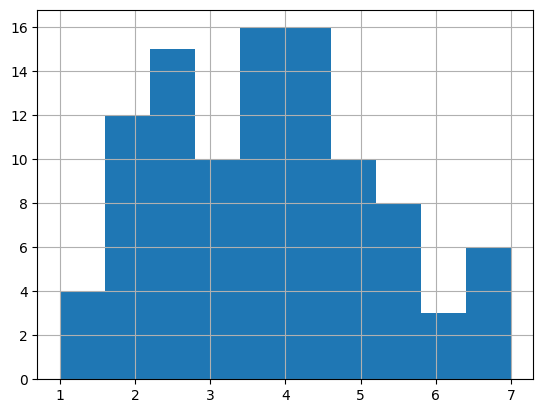

In [49]:
df['M1'].hist()
plt.show()

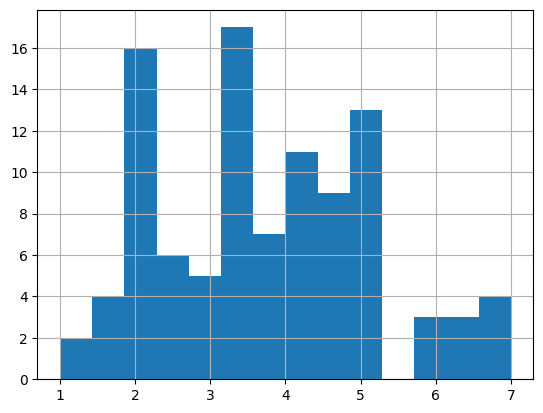

In [52]:
df['M1'].hist(bins=14)
plt.show()

### nâng cao hơn histogram, phân phối xác suất -- phân phối chuẩn


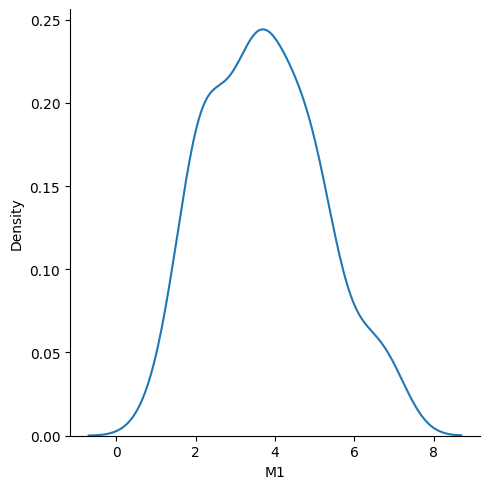

In [53]:
sns.displot(df, x='M1', kind='kde')
plt.show()

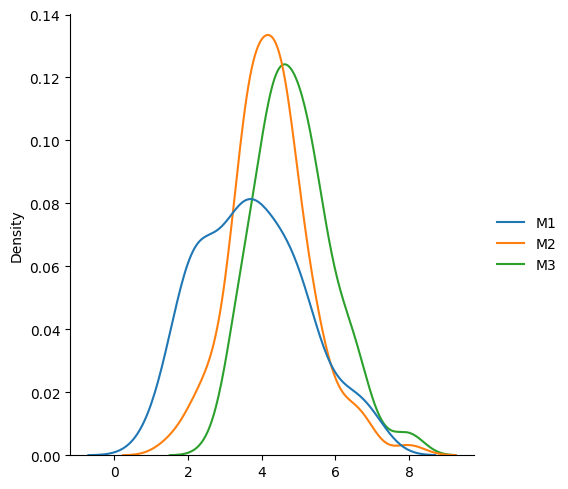

In [54]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()
#M1 phân phối chuẩn hơn

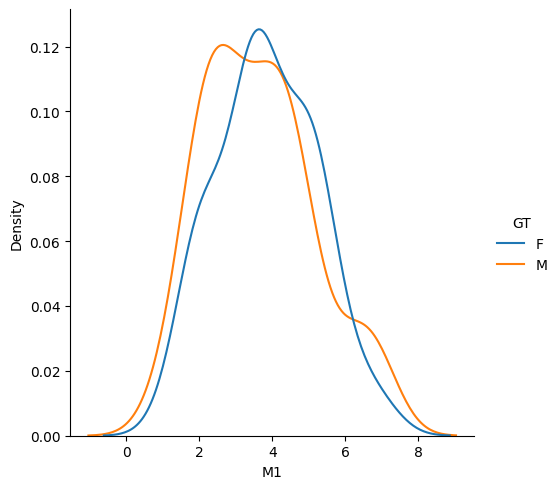

In [55]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

Skewness = độ xiên, độ lớn (trị tuyet đoi) cho biết mức độ du liệu
lệch nhieu hay ít so với đường cong phan phối chuẩn.
Cho biet xac xuat đuoc phan bo lech ve phía nao nhieu

Trị tuyệt đối giá trị càng lớn thì
dữ liệu phân phối nghiêng càng nhiều (lệch)

Diễn giải cho skewness
Skewness > 0 tuc là mean > median : ta goi la Positive Skewness
hay lech phai, tuc la gia tri ngoai bien outliers nhan gia tri lớn
se đay giá trị trung bình về cuối

Skewness < 0 tuc la mean < median: ta goi la Negative Skweness
hay lệch trái, tức là giá trị outlier nhận giá trị nhỏ sẽ đay
giá trị trung bình về phía đầu

Skewness = 0 thi mean = median = mode: Phan phối không lệch
còn được gọi là phân phối đối xứng

In [56]:
df['M1'].skew()

np.float64(0.33322084231625376)

In [57]:
#Note: Khi phân tích dữ liệu với các phương phap co lin quan phan phối chuẩn,
# nếu dữ liệu quá lệch so với phân phối chuẩn thì
# ta cần điều chỉnh bang cac ham transform cho bot lech
# Đặc biệt là phân tích hồi quy

df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

Kurtosis (Pearson Kurtosis): Đo nhon, trị tuyet đoi cho biet m

Giá tri của kutorsis:
Càng gần 3 thì fit
Dưới 3 thi fat
Trên 3 thì thin

Thông thường đe đanh gia hình dáng độ nhọn ta dùng đại lượng
excess kutorsis (con goi la Fisher Kurtosis) = Kurtosis - 3
+ Neu excess > 0 -> thin
+ Neu excess = 0 -> fit
+ Neu excess < 0 -> fat
+ Trị tuyet đoi excess kutoris cang cao thì muc đo thin, fat cang lon

Lưu ý:
+ Trong pandas su dung Fisher's kutorsis
+ Với pp chuần thì excess kurtosis = 0, skewness = 0

In [58]:
df[['M1']].kurtosis()

M1   -0.517004
dtype: float64

In [59]:
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

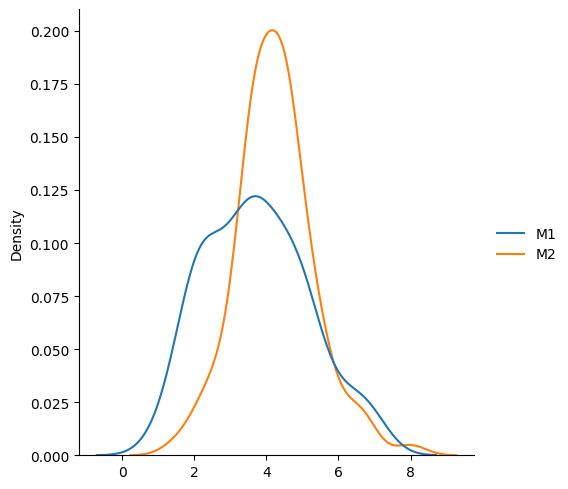

In [60]:
sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()

Day la bieu đo quan trong trong viec phan tich du lieu đinh lượng
Bieu đo nay cung cap cac thong tin quan trọng như
1. Q1: Tứ phân vị 25%
2. Q2: Tứ phân vị 50% (median)
3. Q3: Tứ phân vị 75%
4. Độ lớn IQR = |Q3-Q1|
5. Lower bound = Q1 - 1.5*IQR
6. Upper bound = Q3 + 1.5* IQR
7. Các ngoại biên, bat thường (outlier) cần xử lý trong dữ liệu
Outlier: La điem du lieu khac biet qua nhieu so voi đa so
Hướng dẫn
+ Tính khoảng nghi ngo chứa outliers
+ Tính khoảng chac chan chứa outliers

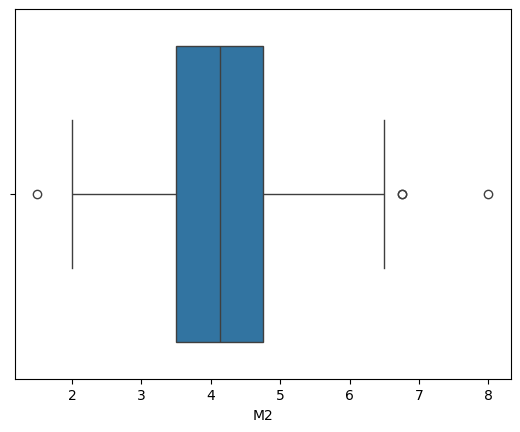

In [62]:
sns.boxplot(data=df['M2'], orient="h")
plt.show()

In [ ]:
# Với điểm M2
# Hãy tính khoảng giá trị nghi ngờ bất thường
# Hãy tính khoảng giá trị được cho là bất thường
# Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường

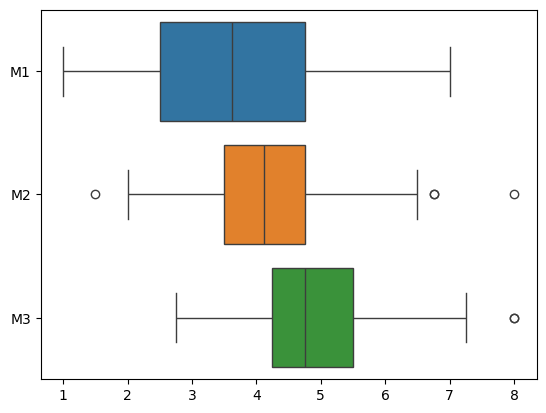

In [63]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

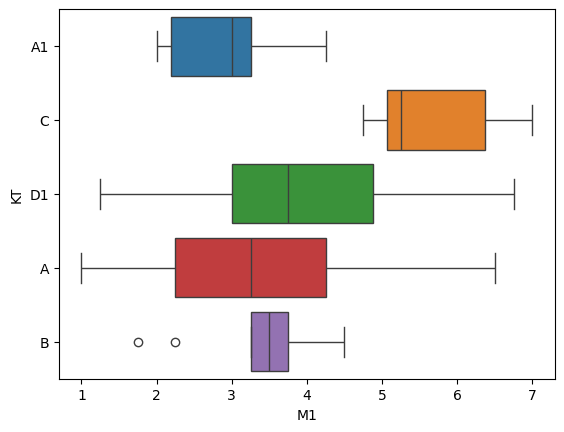

In [84]:
sns.boxplot(x='M1', y='KT', hue='KT',data=df, orient='h')
plt.show()

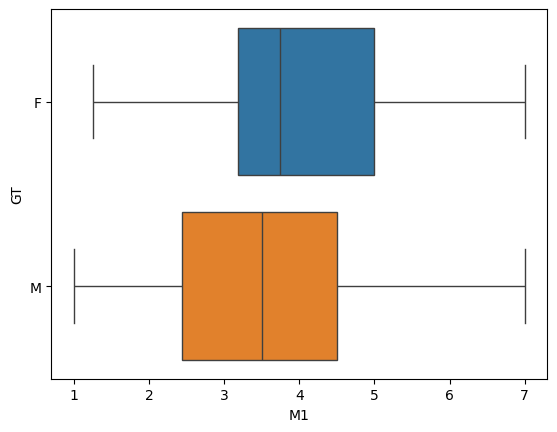

In [82]:
sns.boxplot(x='M1', y='GT', hue='GT',data=df, orient='h')
plt.show()

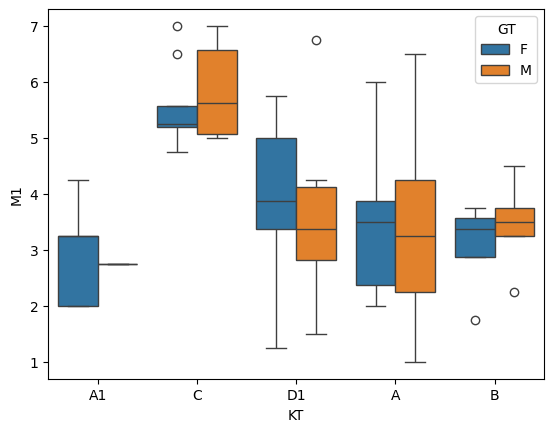

In [66]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()


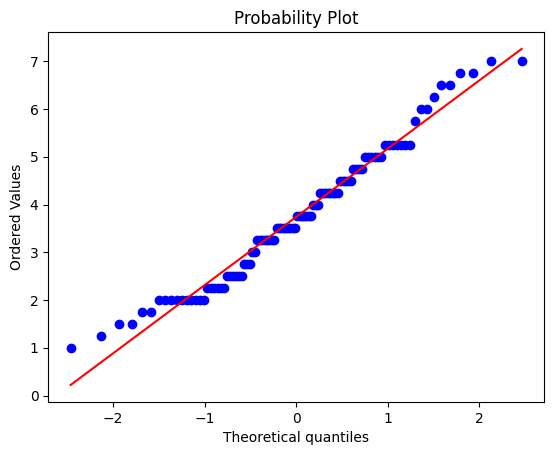

In [67]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

Phương pháp 1: Hiep phưong sai: co-variance

Giá trị co-variance > 0 thì 2 biển có tương quan thuận (đồng biển)

Giá trị co-variance < 0 thì 2 biển có tương quan nghịch (nghịch biển)

Gia tri co-variance = 0 thì 2 bien không tương quan

Do lon (tri tuyet đoi cua gia tri) cang lon thi muc đo quan he (tuong quan) cang chặt chẽ

Ma tran hiep phưong sai: co-variance matrix

In [68]:
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


Với phương phap so sanh tưong quan bang co-variance thì ta khong do luong duoc cuong do tuong quan giua 2 bien dinh lưong.

Pearson Correlation: Tuong quan tuyen tinh r nåm trong khoang [-1,1]
- r = 0 => không tương quan
- r < 0: Tương quan nghịch
- r > 0: Tương quan thuận
+ [r| càng gần 1 thì tương quan càng cao
+ |r| < 0.5: thì tương quan thấp
+ [0.5,0.65]: khá
+ [0.65,0.75]: tốt
+ [0.75,0.9]: rất tốt
>0.9: hoàn hảo

Ma tran tuong quan: correlation matrix

* Lưu ý: được sử dụng khảo sát tương quan tuyen tính nhằm
phân tích moi quan hệ tuyen tính giua 2 bien định lượng

In [69]:
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


In [71]:
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


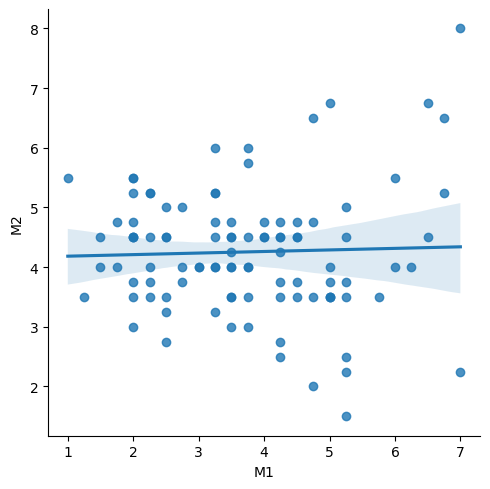

In [70]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

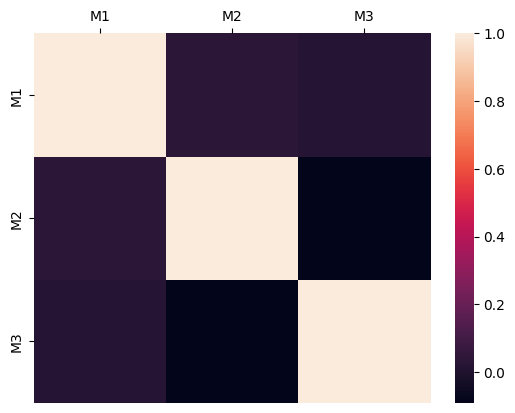

In [72]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

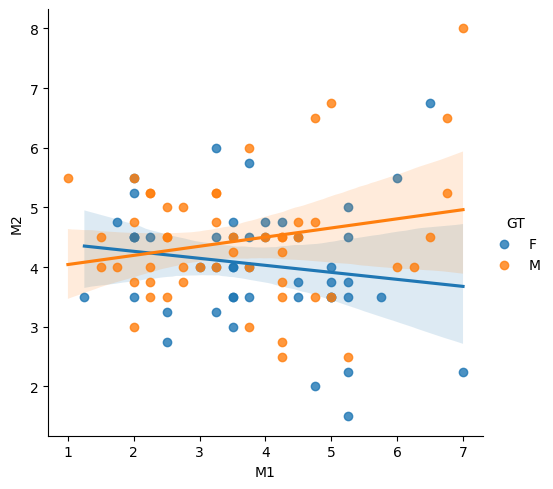

In [73]:
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

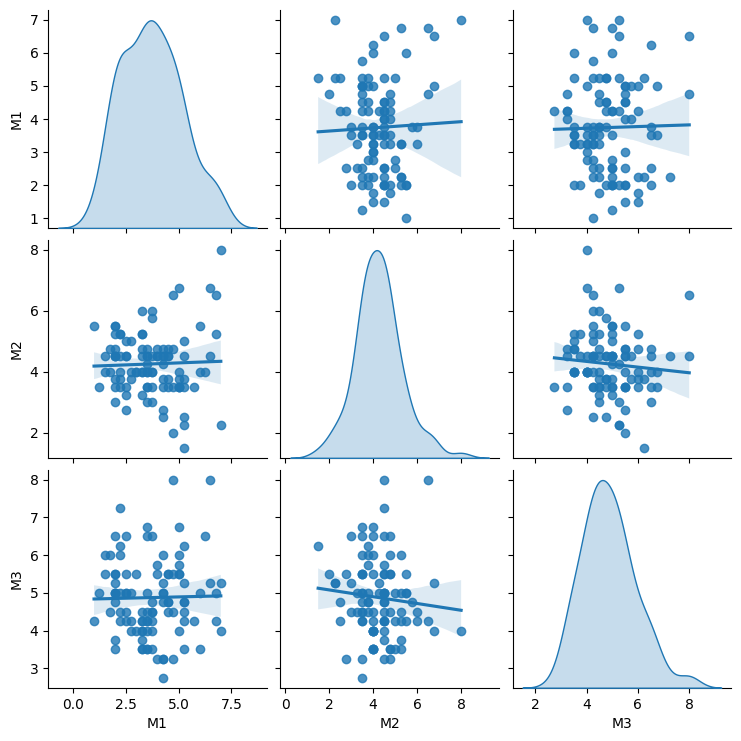

In [74]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()